In [1]:
import pyreadr
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from dredFISH.Utils.__init__plots import *

In [2]:
f = 'SamplesheetAgeP39final.csv'
meta = pd.read_csv(f)
meta

,OriginalOrderInBatch,ExternalSampleID,Basename,Age,ConfidenceInAgeEstimate,CanBeUsedForAgingStudies,SpeciesLatinName,SpeciesCommonName,Tissue,Female,...,Steve.InterventionClock.AgeTraf.Cortex.clock.epiAge,Steve.InterventionClock.AgeTraf.Fibroblast.clock.epiAge,Steve.InterventionClock.AgeTraf.Heart.clock.epiAge,Steve.InterventionClock.AgeTraf.Kidney.clock.epiAge,Steve.InterventionClock.AgeTraf.Liver.clock.epiAge,Steve.InterventionClock.AgeTraf.Muscle.clock.epiAge,Steve.InterventionClock.AgeTraf.panTissue.clock.epiAge,Steve.InterventionClock.AgeTraf.Skin.clock.epiAge,Steve.InterventionClock.AgeTraf.Striatum.clock.epiAge,Steve.InterventionClock.AgeTraf.Tail.clock.epiAge
0,1,20147-9 #1,206535570066_R05C02,0.333333,100,yes,Mus musculus,Mouse,Olfactory Bulb,0,...,4.033001,4.926304,0.842963,1.900062,0.269345,2.317238,0.149250,0.662770,4.115116,0.536970
1,2,20207-9 #1,206535570066_R06C02,0.416667,100,yes,Mus musculus,Mouse,Olfactory Bulb,1,...,3.847563,1.656940,0.257613,2.984474,0.363235,1.440735,1.012970,0.485708,4.394053,1.194265
2,3,17016-9 #1,206535570010_R01C01,0.391667,100,yes,Mus musculus,Mouse,Trigeminal nerve,1,...,3.447378,2.460107,-0.041745,0.386455,0.360516,2.363680,0.459224,0.400640,5.752594,1.929016
3,4,17100-9B #1,206535570010_R02C01,0.275000,100,yes,Mus musculus,Mouse,Meninges,0,...,2.556212,1.965027,-0.058308,2.483933,0.127727,1.599632,0.273974,0.232241,5.726338,2.257875
4,5,18161-10B #1,206535570010_R03C01,0.308333,100,yes,Mus musculus,Mouse,Trigeminal nerve,1,...,4.328767,6.060459,-0.016699,3.926171,0.505825,3.300223,0.165580,0.695521,1.290540,0.561456
5,6,20074-9B #1,206535570010_R04C01,0.300000,100,yes,Mus musculus,Mouse,Retro-orbital,1,...,5.105332,2.609845,0.132868,0.668717,0.432172,1.498241,0.568705,0.620582,2.912459,0.426205
6,7,20095-9 #1,206535570010_R05C01,0.416667,100,yes,Mus musculus,Mouse,Optic nerve,0,...,2.409617,0.126154,-0.020210,0.163322,0.205064,0.421941,0.543390,0.260301,1.648521,0.348279
7,8,20137-9 #1,206535570010_R06C01,0.258333,100,yes,Mus musculus,Mouse,Olfactory bulb,0,...,3.407836,0.888272,0.304209,1.353959,0.223376,0.726891,0.534108,0.285111,2.566658,0.646184
8,9,20142-9 #1,206535570010_R01C02,0.366667,100,yes,Mus musculus,Mouse,Nasal cavity,1,...,3.945867,2.776968,1.454515,2.627008,0.435729,3.059793,0.680205,0.646078,4.466324,0.501263
9,10,20191-9 #1,206535570010_R02C02,0.400000,100,yes,Mus musculus,Mouse,Throat,1,...,5.342979,4.463271,0.928019,0.044868,0.346802,3.442907,0.200563,0.687147,5.833257,0.548300


In [3]:
f = "all_probes_sesame_normalized.RDS" 
df = pyreadr.read_r(f)[None]
df = df.T
df

,206535570066_R05C02,206535570066_R06C02,206535570010_R01C01,206535570010_R02C01,206535570010_R03C01,206535570010_R04C01,206535570010_R05C01,206535570010_R06C01,206535570010_R01C02,206535570010_R02C02,206535570010_R03C02,206535570010_R04C02
cg00000165_TC21,0.464574,0.483712,0.485698,0.512629,0.488281,0.490644,0.496566,0.491678,0.485013,0.442666,0.507296,0.465939
cg00001209_TC21,0.709015,0.647783,0.642106,0.558514,0.670084,0.668659,0.692513,0.789740,0.638012,0.240190,0.714195,0.696545
cg00001364_TC21,0.749347,0.914103,0.914649,0.516546,0.899112,0.916861,0.748892,0.912464,0.913994,0.920995,0.818239,0.859054
cg00001582_TC21,0.054638,0.054335,0.053501,0.081808,0.057557,0.062748,0.038457,0.051540,0.060898,0.036618,0.067346,0.061484
cg00002920_TC21,0.199709,0.117025,0.298558,0.272371,0.214564,0.189437,0.321178,0.354263,0.193437,0.308441,0.354261,0.384626
...,...,...,...,...,...,...,...,...,...,...,...,...
rs877309_BC21,0.473372,0.546911,0.511721,0.494019,0.515623,0.496569,0.520476,0.518697,0.567449,0.480997,0.516118,0.508063
rs9292570_BC11,0.495280,0.503069,0.504700,0.506527,0.522663,0.530290,0.512177,0.484462,0.496929,0.480304,0.445632,0.487827
rs9363764_BC21,0.515029,0.459686,0.519578,0.508826,0.486397,0.479303,0.455853,0.487021,0.467514,0.541826,0.511584,0.463032
rs951295_BC11,0.056931,0.044640,0.060683,0.060909,0.055960,0.059086,0.056436,0.049847,0.047304,0.047698,0.076089,0.071503


In [4]:
m_probes = df.index.values
mps = np.array([p.split('_')[0] for p in m_probes]) # may be duplicated
mps.shape, np.unique(mps).shape

((326732,), (319280,))

In [5]:
mdf = df.copy()
mdf.index = mps
mdf = mdf[~mdf.index.duplicated(keep='first')] # a hack
mps = mdf.index.values
print(mps.shape)
mdf

(319280,)


,206535570066_R05C02,206535570066_R06C02,206535570010_R01C01,206535570010_R02C01,206535570010_R03C01,206535570010_R04C01,206535570010_R05C01,206535570010_R06C01,206535570010_R01C02,206535570010_R02C02,206535570010_R03C02,206535570010_R04C02
cg00000165,0.464574,0.483712,0.485698,0.512629,0.488281,0.490644,0.496566,0.491678,0.485013,0.442666,0.507296,0.465939
cg00001209,0.709015,0.647783,0.642106,0.558514,0.670084,0.668659,0.692513,0.789740,0.638012,0.240190,0.714195,0.696545
cg00001364,0.749347,0.914103,0.914649,0.516546,0.899112,0.916861,0.748892,0.912464,0.913994,0.920995,0.818239,0.859054
cg00001582,0.054638,0.054335,0.053501,0.081808,0.057557,0.062748,0.038457,0.051540,0.060898,0.036618,0.067346,0.061484
cg00002920,0.199709,0.117025,0.298558,0.272371,0.214564,0.189437,0.321178,0.354263,0.193437,0.308441,0.354261,0.384626
...,...,...,...,...,...,...,...,...,...,...,...,...
rs877309,0.473372,0.546911,0.511721,0.494019,0.515623,0.496569,0.520476,0.518697,0.567449,0.480997,0.516118,0.508063
rs9292570,0.495280,0.503069,0.504700,0.506527,0.522663,0.530290,0.512177,0.484462,0.496929,0.480304,0.445632,0.487827
rs9363764,0.515029,0.459686,0.519578,0.508826,0.486397,0.479303,0.455853,0.487021,0.467514,0.541826,0.511584,0.463032
rs951295,0.056931,0.044640,0.060683,0.060909,0.055960,0.059086,0.056436,0.049847,0.047304,0.047698,0.076089,0.071503


In [6]:
hps = np.load('./data/m320k_i450k_overlap_5559.npy')
hps

array(['cg00000165', 'cg00001364', 'cg00001582', ..., 'rs9363764',
       'rs951295', 'rs9839873'], dtype='<U23')

In [7]:
cps = np.intersect1d(mps, hps)
mps.shape, hps.shape, cps.shape

((319280,), (5559,), (5558,))

In [8]:
df_m = mdf.loc[cps]
df_m

,206535570066_R05C02,206535570066_R06C02,206535570010_R01C01,206535570010_R02C01,206535570010_R03C01,206535570010_R04C01,206535570010_R05C01,206535570010_R06C01,206535570010_R01C02,206535570010_R02C02,206535570010_R03C02,206535570010_R04C02
cg00000165,0.464574,0.483712,0.485698,0.512629,0.488281,0.490644,0.496566,0.491678,0.485013,0.442666,0.507296,0.465939
cg00001364,0.749347,0.914103,0.914649,0.516546,0.899112,0.916861,0.748892,0.912464,0.913994,0.920995,0.818239,0.859054
cg00001582,0.054638,0.054335,0.053501,0.081808,0.057557,0.062748,0.038457,0.051540,0.060898,0.036618,0.067346,0.061484
cg00003994,0.038456,0.030914,0.040603,0.039053,0.043289,0.042252,0.034478,0.025306,0.048871,0.034659,0.027721,0.035719
cg00005112,0.770640,0.651730,0.478689,0.821402,0.587515,0.760703,0.585092,0.736821,0.659390,0.258120,0.646212,0.493449
...,...,...,...,...,...,...,...,...,...,...,...,...
rs877309,0.473372,0.546911,0.511721,0.494019,0.515623,0.496569,0.520476,0.518697,0.567449,0.480997,0.516118,0.508063
rs9292570,0.495280,0.503069,0.504700,0.506527,0.522663,0.530290,0.512177,0.484462,0.496929,0.480304,0.445632,0.487827
rs9363764,0.515029,0.459686,0.519578,0.508826,0.486397,0.479303,0.455853,0.487021,0.467514,0.541826,0.511584,0.463032
rs951295,0.056931,0.044640,0.060683,0.060909,0.055960,0.059086,0.056436,0.049847,0.047304,0.047698,0.076089,0.071503


<AxesSubplot:ylabel='Count'>

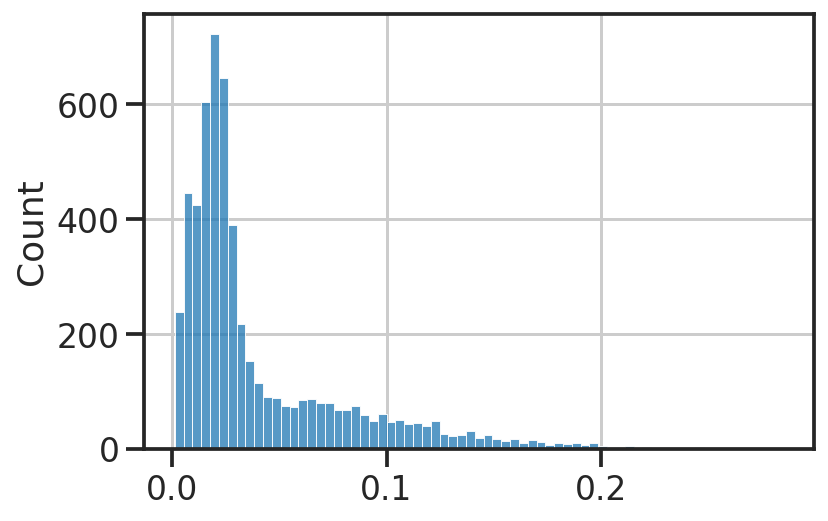

In [9]:
sns.histplot(df_m.std(axis=1))

/home/fangming/anaconda3/envs/routine/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


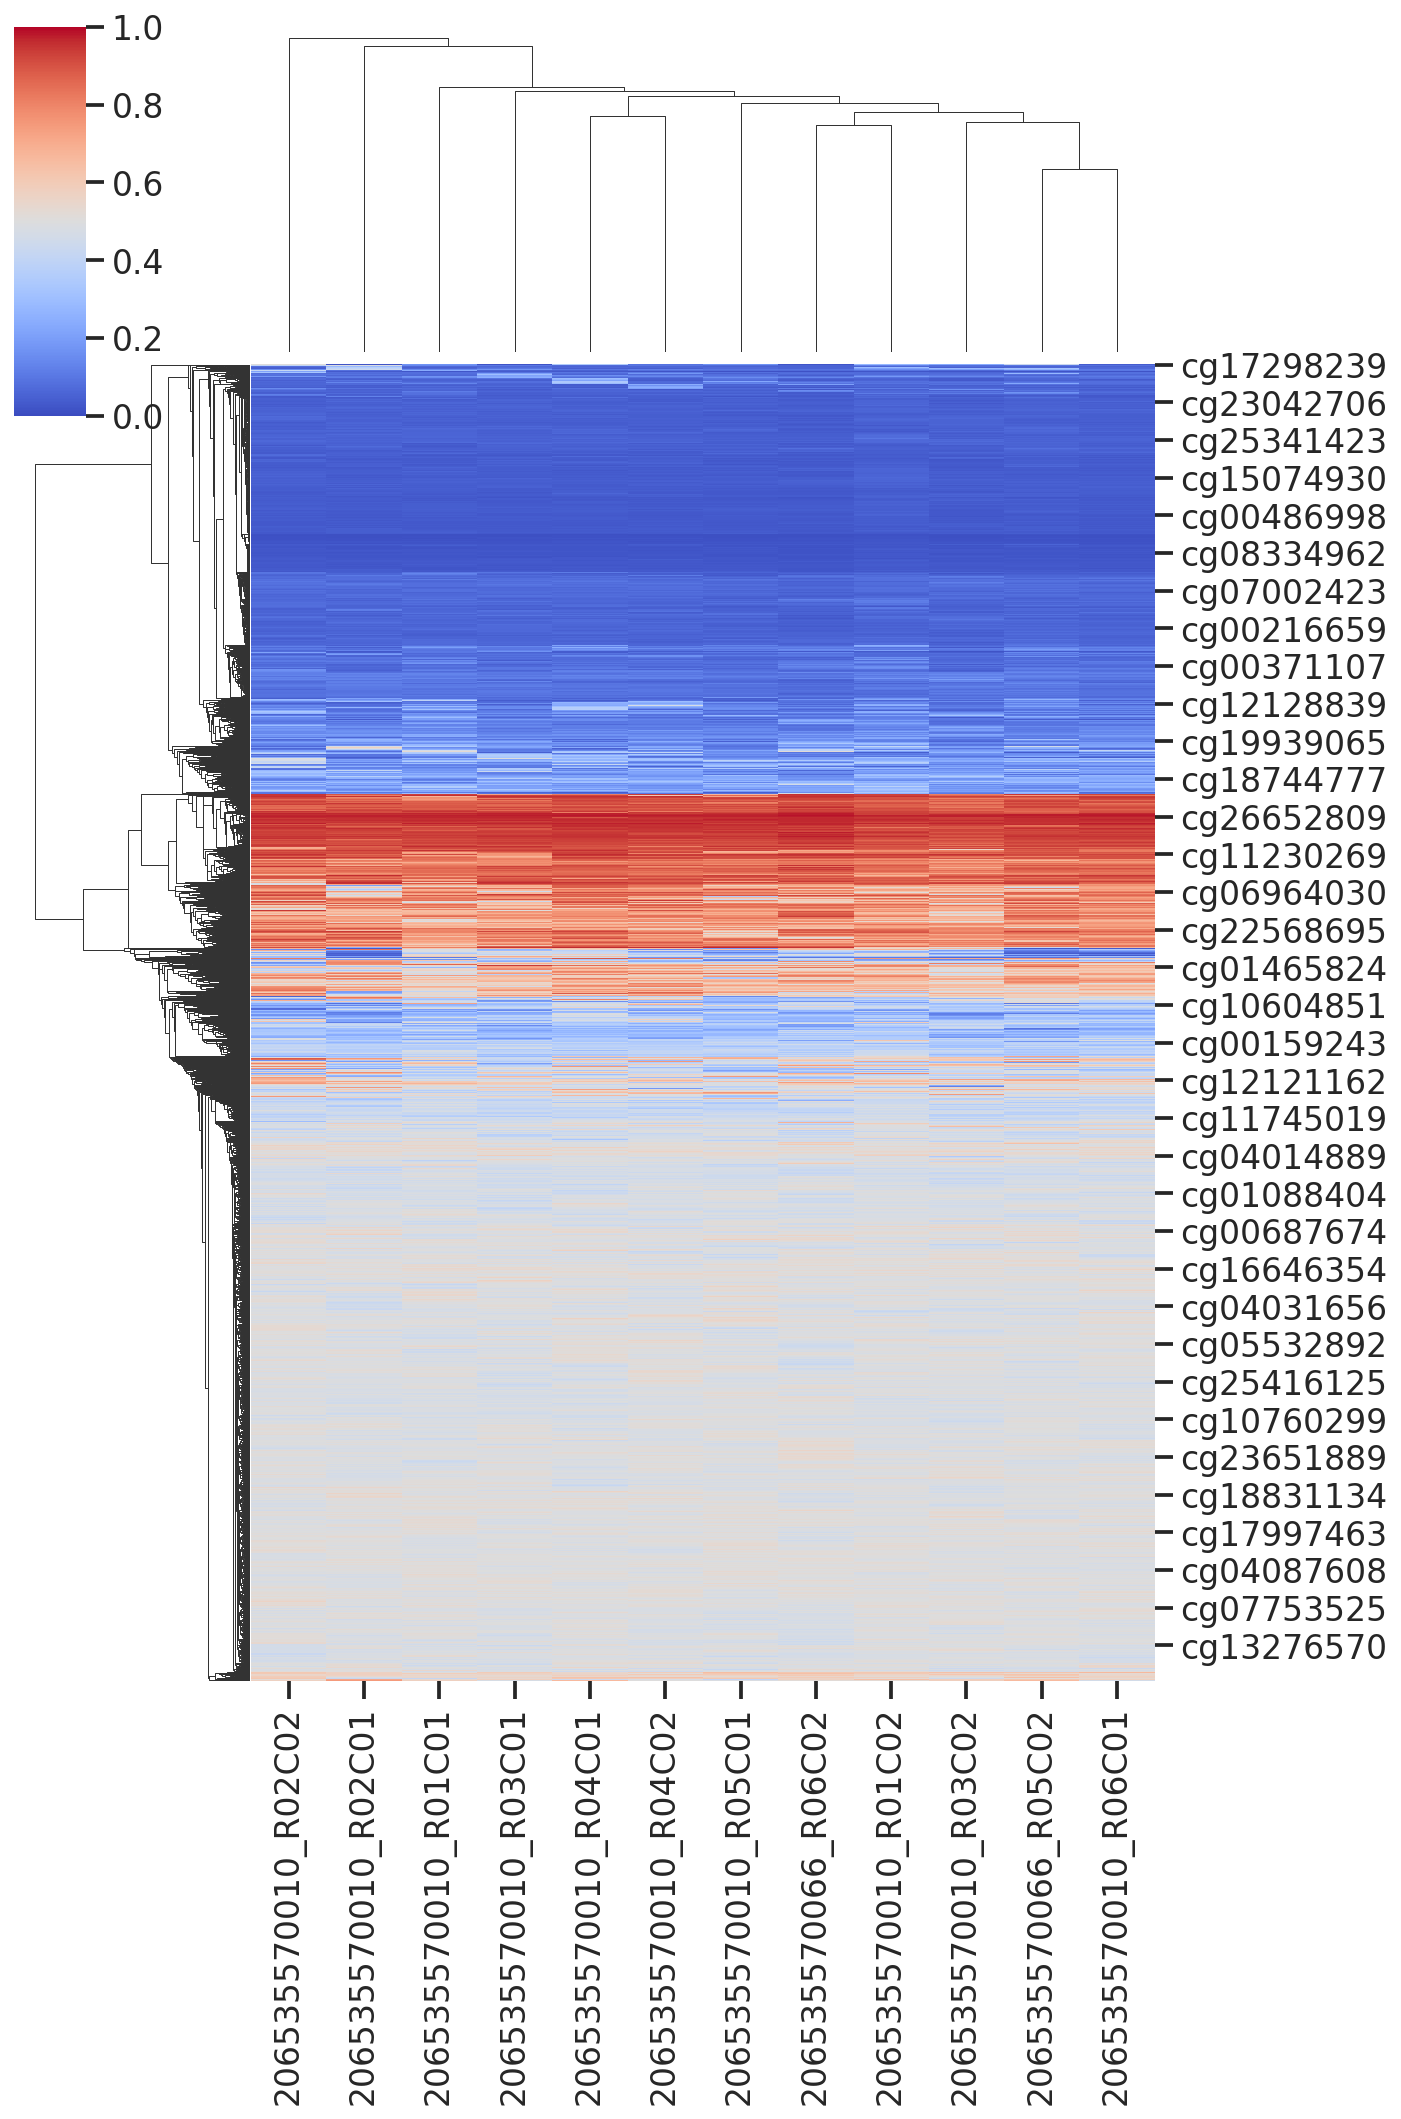

In [10]:
sns.clustermap(df_m, cmap='coolwarm', figsize=(10,15), vmin=0, vmax=1)

(571, 12)


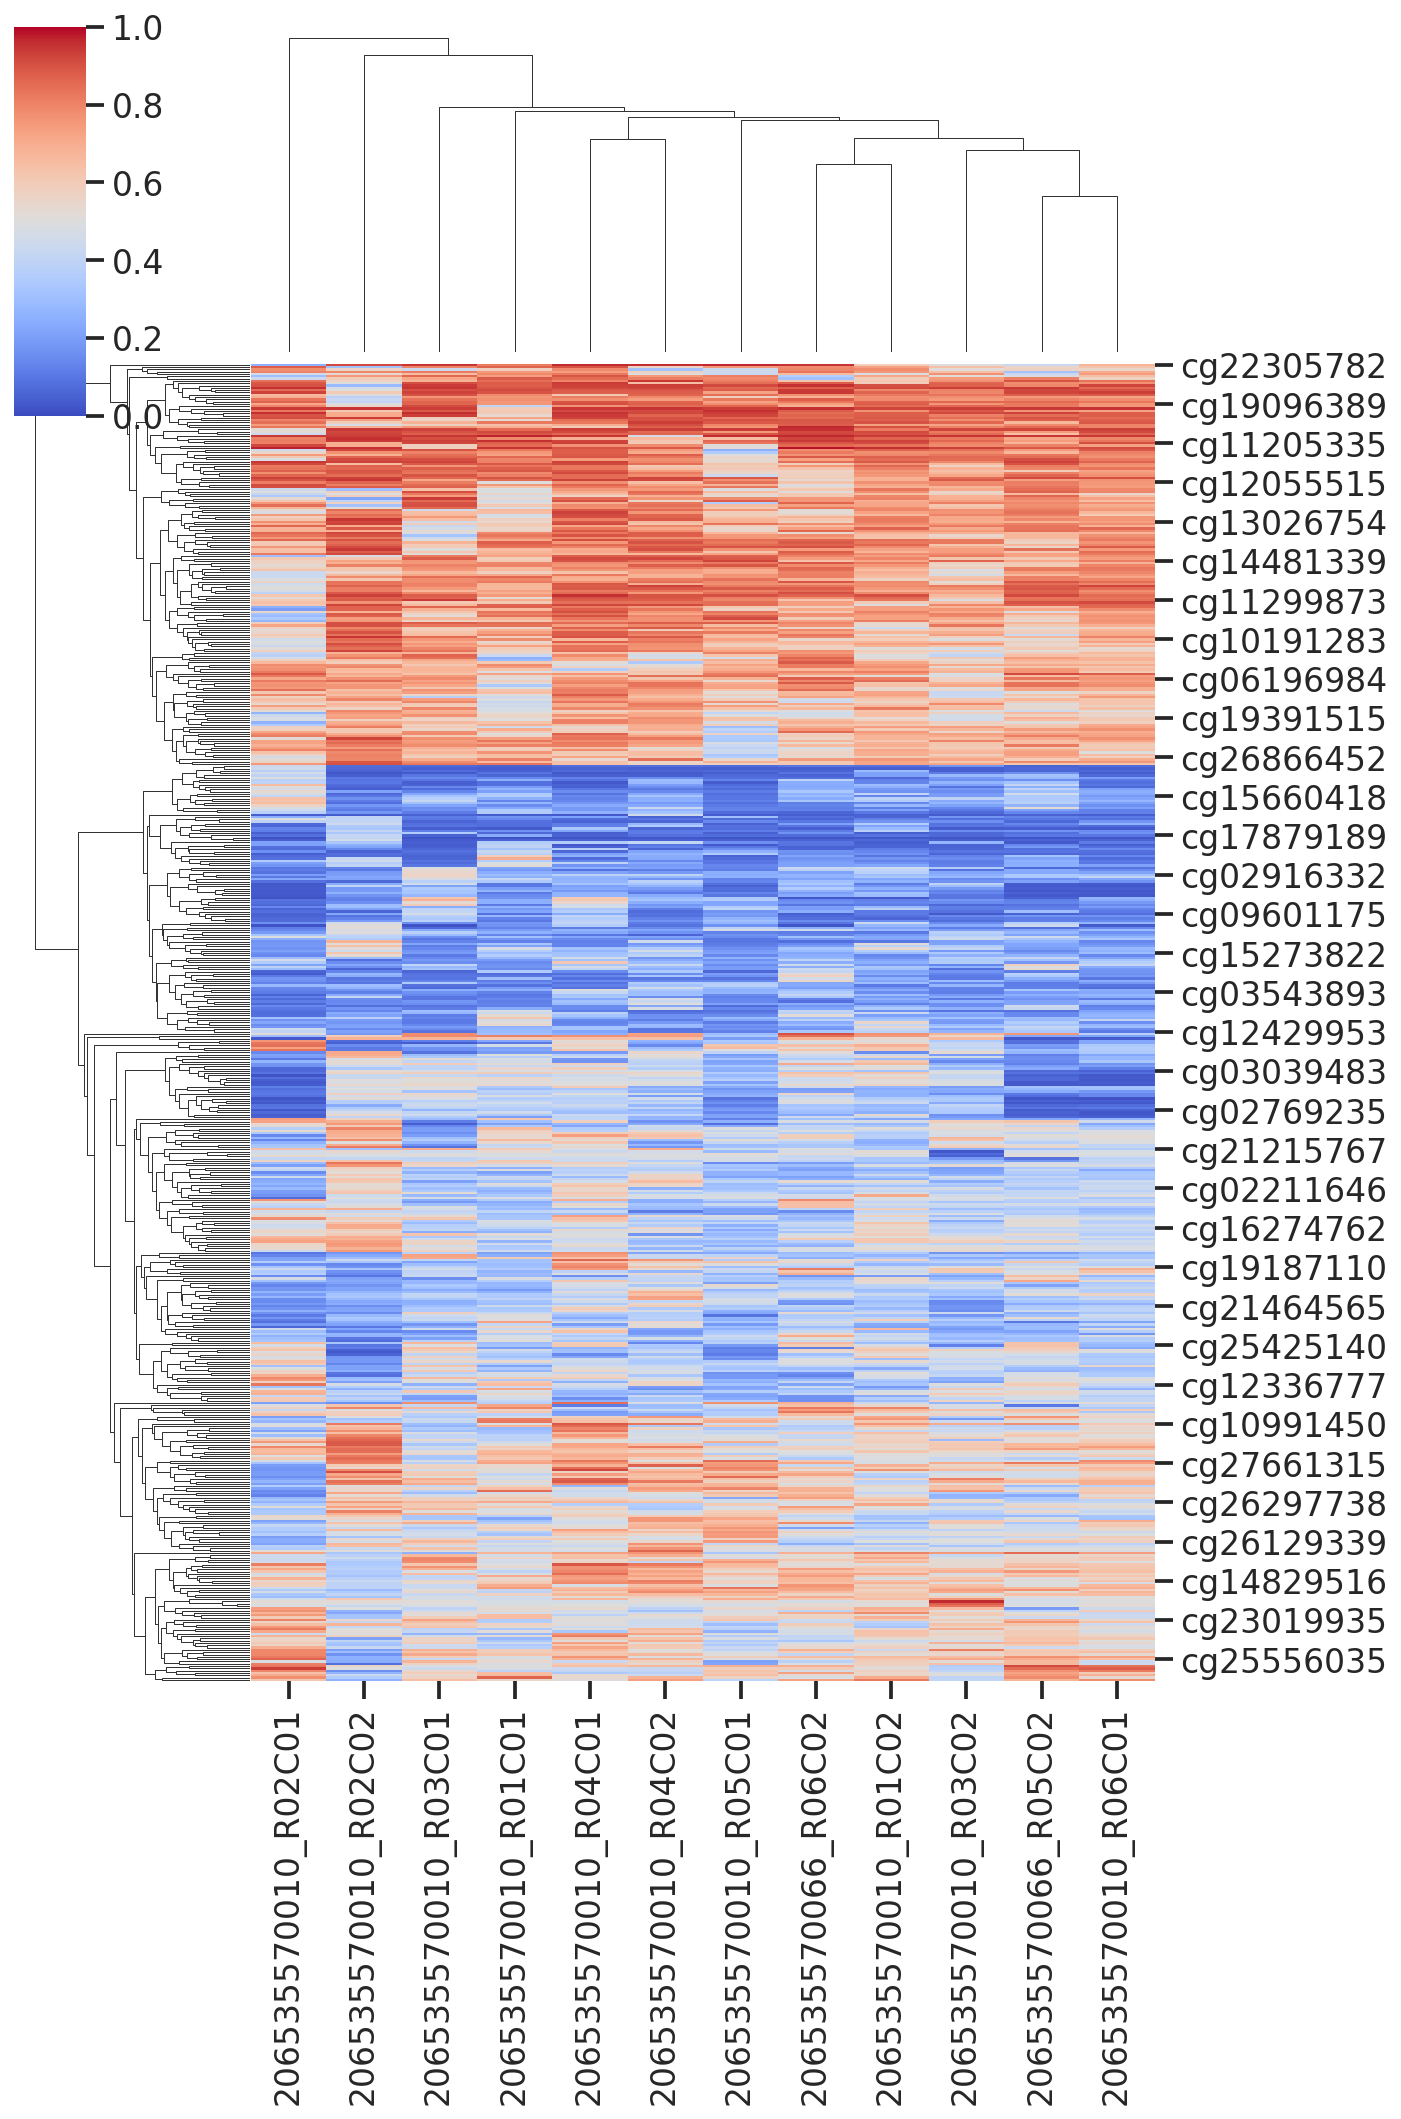

In [11]:
df_m_hv = df_m[df_m.std(axis=1)>0.1].copy()
print(df_m_hv.shape)
sns.clustermap(df_m_hv, cmap='coolwarm', figsize=(10,15), vmin=0, vmax=1)

(156, 12)


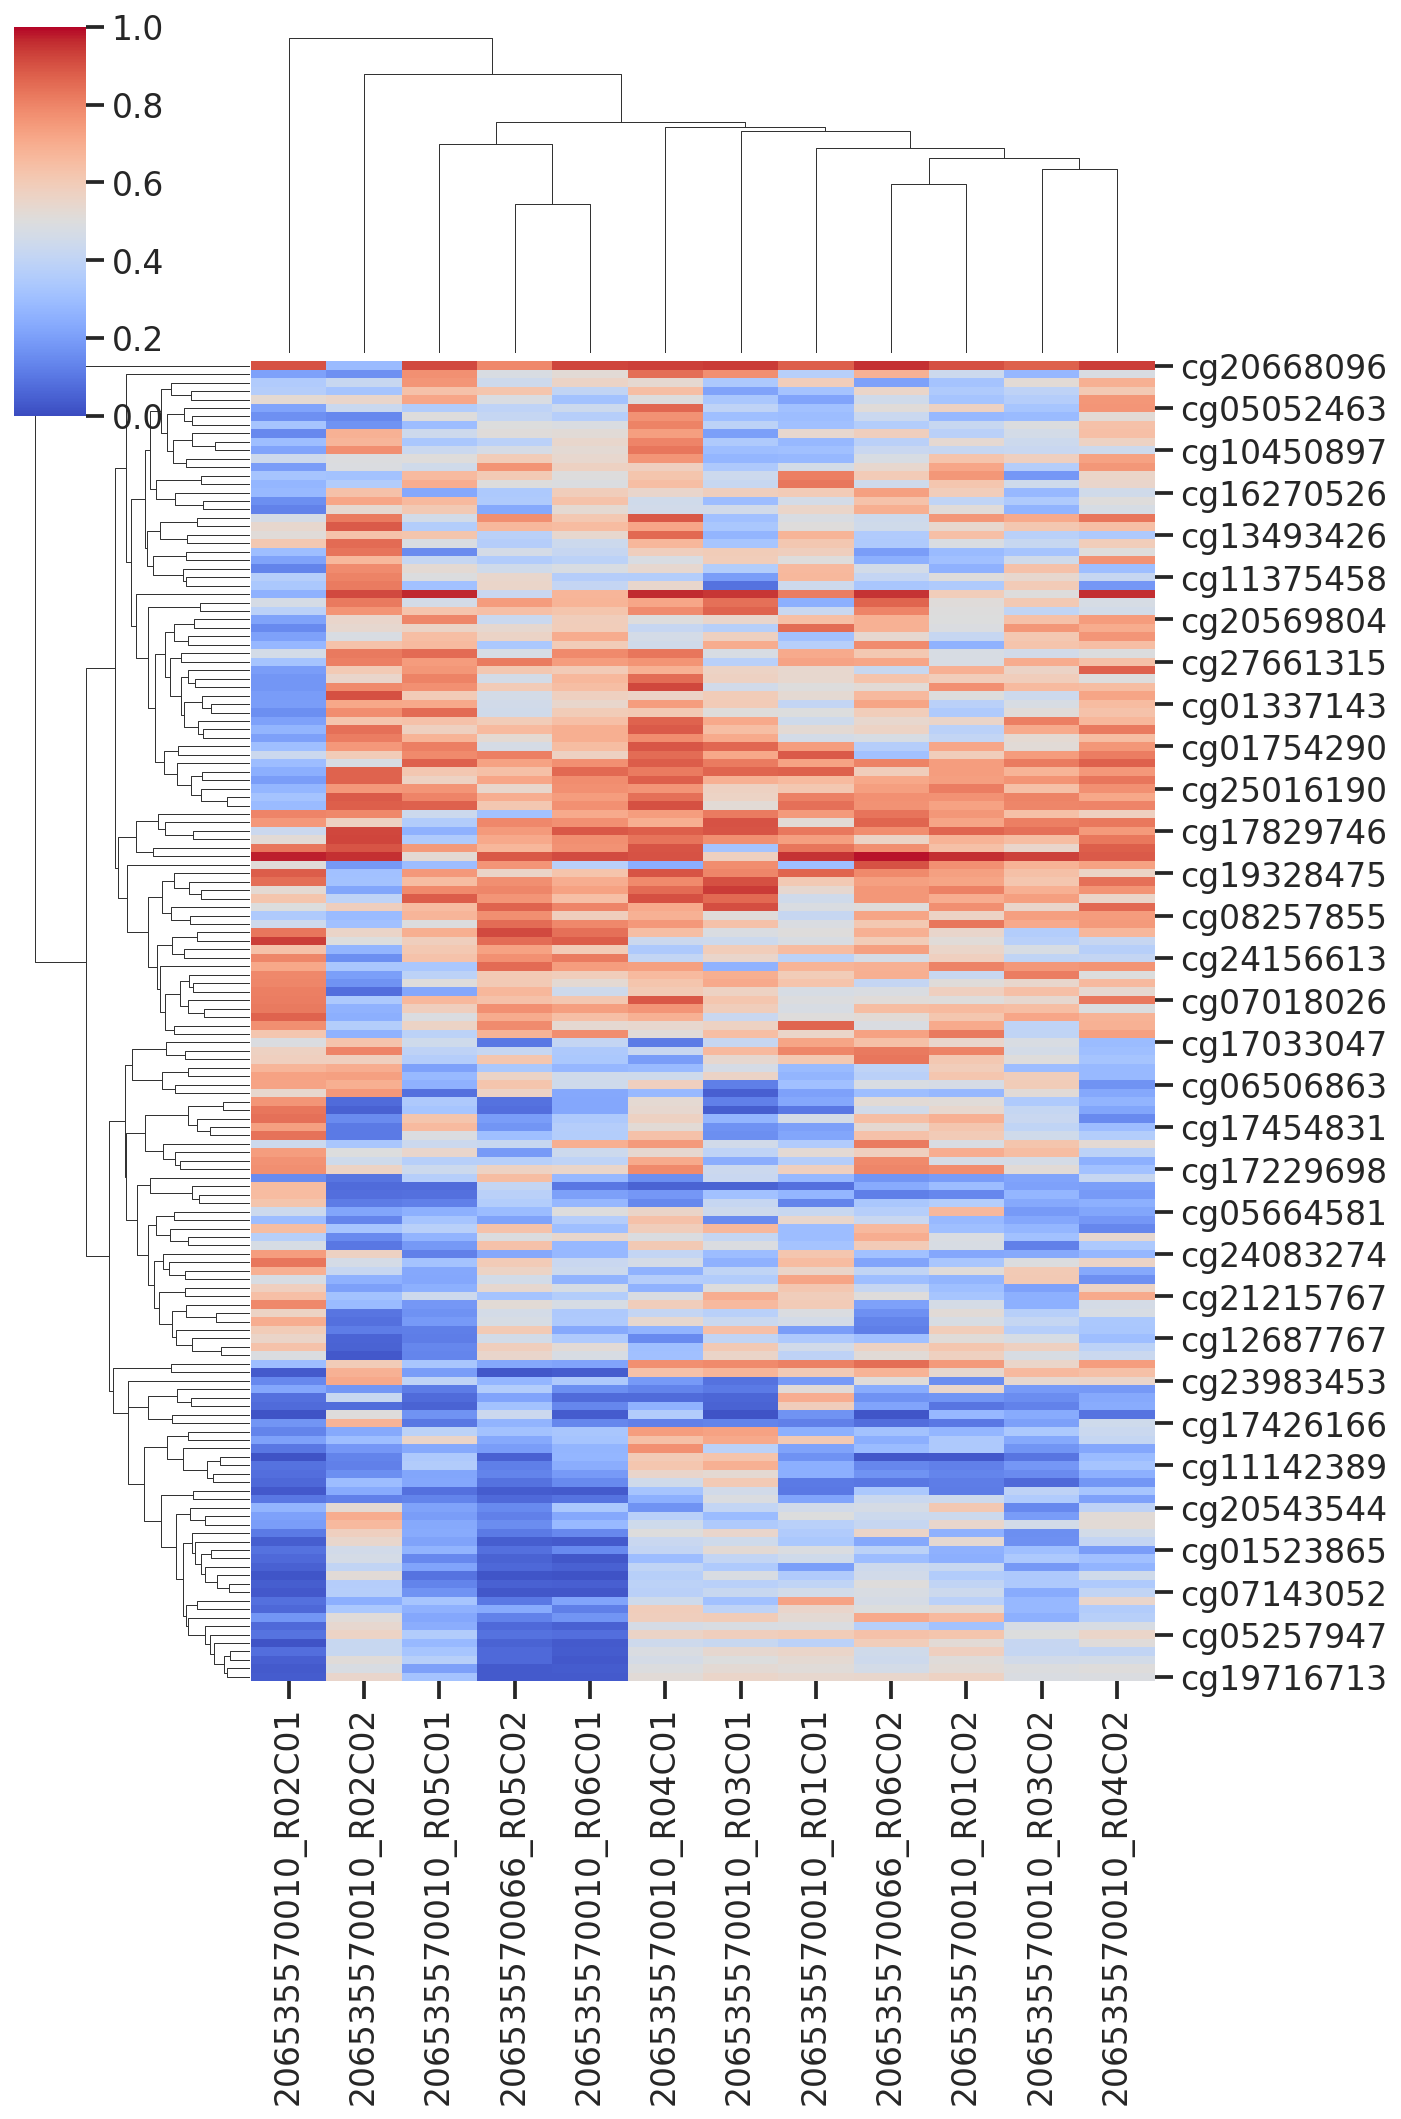

In [12]:
df_m_hv = df_m[df_m.std(axis=1)>0.15].copy()
print(df_m_hv.shape)
sns.clustermap(df_m_hv, cmap='coolwarm', figsize=(10,15), vmin=0, vmax=1)

(21, 12)


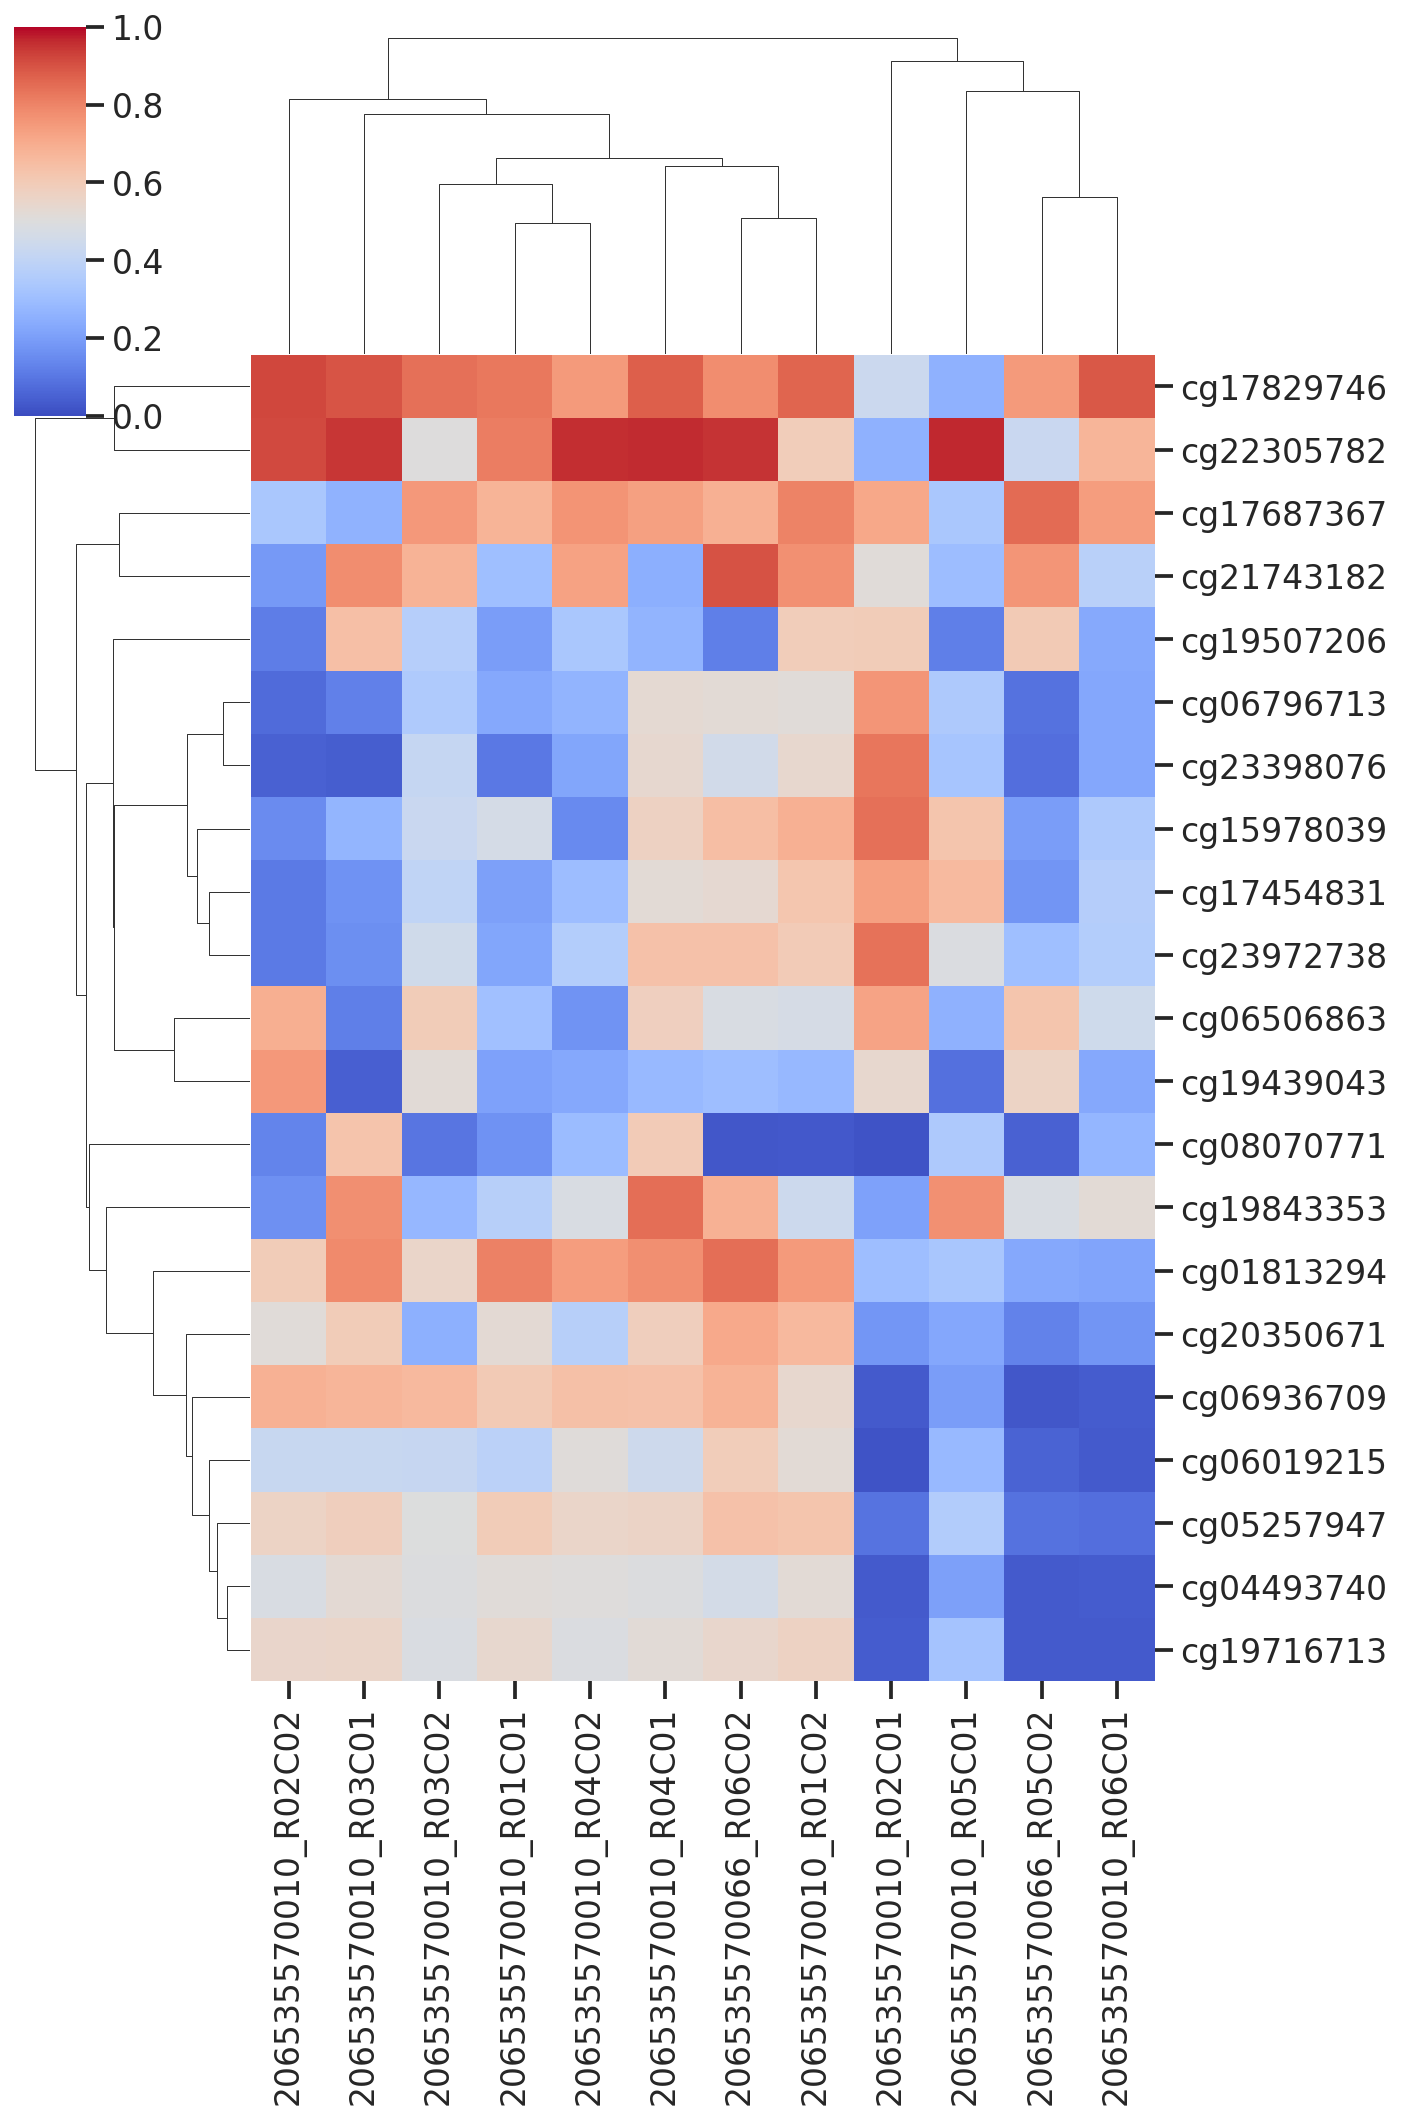

In [13]:
df_m_hv = df_m[df_m.std(axis=1)>0.2].copy()
print(df_m_hv.shape)
sns.clustermap(df_m_hv, cmap='coolwarm', figsize=(10,15), vmin=0, vmax=1)